In [ ]:
#All the necessary packages are imported

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from gensim import utils
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive this was imported only to access the data from the 
#google drive
drive.mount("/content/driver")

Mounted at /content/driver


In [ ]:
sonic_df = pd.read_excel("/content/Sonic_similarity_shuffled.xls")#data set is loaded

In [ ]:
sonic_df.head(1)#confirmed the dataframe

,score,sourceChord,sourcename,targetChord,targetname,duplicate
0,0.439064,"['III', 'III64', '-II', '-VII', 'III', 'v42', ...",lava-reef-zone-hidden-palace-zone.mid,"['ii7', 'i', 'i', 'II7', 'v', 'v', 'v42', 'v42...",sky-sanctuary-zone-2-.mid,0


In [ ]:
#sonic_df = sonic_df.drop(columns=["sourcevector","targetvector"])

In [ ]:
#sonic_df = sonic_df.drop(columns=sonic_df.columns[0])

In [ ]:
duplicate = []    #this piece of code to add a new column to the dataframe 
#which will contain the 0 or 1 value to check whether the piece is plagiarised based on
#cosine similarity measurement
for i in sonic_df.score:
   if i > 0.5:  #here the plagiarism threshold value is adjusted for 0.8,0.7,0.6,0.5
      duplicate.append(1)
   else:
      duplicate.append(0)

sonic_df['duplicate'] = duplicate



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
corpus = []   #the chords are converted to bag of words to be
#vectorized

for i in range(len(sonic_df)):
    source = re.sub("\[|\]|\,|\'|,","",sonic_df['sourceChord'][i])
    target = re.sub("\[|\]|\,|\'|,","",sonic_df['targetChord'][i])
    source = source.lower()
    target = target.lower()
    source = source.split()
    target = target.split()
    source = ' '.join(source)
    target = ' '.join(target)
    sourceandtarget = source + target
    corpus.append(sourceandtarget)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 577)
X = cv.fit_transform(corpus).toarray()  #vectorization happens here

In [ ]:
y = sonic_df['duplicate']    #train test spliting happens

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Naive Bayes is : ")
print(cm)

Confusion matrix for Naive Bayes is : 
[[ 3573   234]
 [31533  5251]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.32      0.41     16809
           1       0.63      0.82      0.72     23782

    accuracy                           0.62     40591
   macro avg       0.60      0.57      0.56     40591
weighted avg       0.60      0.62      0.59     40591



In [ ]:
#Roc Plot
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

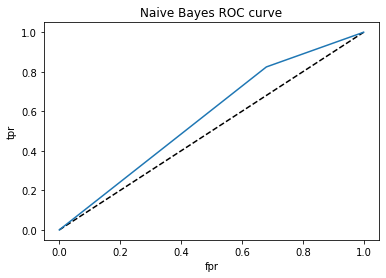

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier1.predict(X_test)

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Logistic regression is : ")
print(cm1)

Confusion matrix for Logistic regression is : 
[[   18  3789]
 [   65 36719]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.00      0.01      3807
           1       0.91      1.00      0.95     36784

    accuracy                           0.91     40591
   macro avg       0.56      0.50      0.48     40591
weighted avg       0.84      0.91      0.86     40591



In [ ]:
#Roc Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

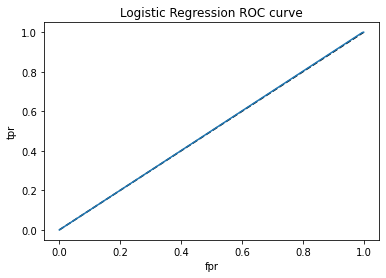

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [ ]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = classifier2.predict(X_test)


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predD)
print("Confusion matrix for Decision tree is is : ")
print(cm2)

Confusion matrix for Decision tree is is : 
[[ 3206   601]
 [  479 36305]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.00      0.01      3807
           1       0.91      1.00      0.95     36784

    accuracy                           0.91     40591
   macro avg       0.56      0.50      0.48     40591
weighted avg       0.84      0.91      0.86     40591



In [ ]:
#roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

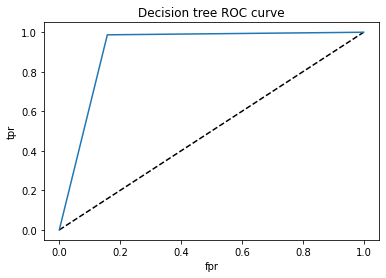

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Decision tree ROC curve')
plt.show()

In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier3.predict(X_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion matrix for Random Forest  is : ")
print(cm3)

Confusion matrix for Random Forest  is : 
[[15529  1280]
 [ 1399 22383]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3807
           1       0.98      1.00      0.99     36784

    accuracy                           0.98     40591
   macro avg       0.97      0.89      0.92     40591
weighted avg       0.98      0.98      0.98     40591



In [ ]:
#Roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,3)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

    print(k)



1
2


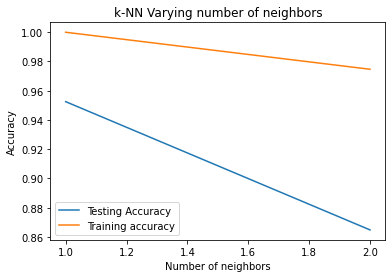

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion matrix for KNN  is : ")
print(cm3)

Confusion matrix for KNN  is : 
[[ 3490   317]
 [ 1783 35001]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77      3807
           1       0.99      0.95      0.97     36784

    accuracy                           0.95     40591
   macro avg       0.83      0.93      0.87     40591
weighted avg       0.96      0.95      0.95     40591



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]



In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


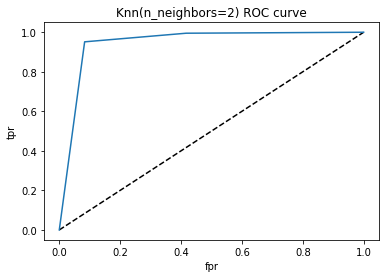

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

Visualization of results using bar graph


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 

Text(0.5, 1.0, 'Accuracy at different threshold of KNN Model')

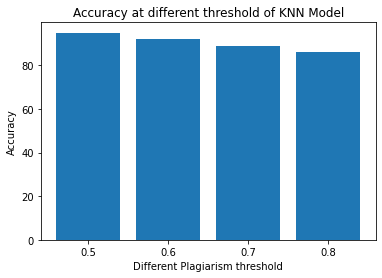

In [ ]:
#this bar plot is used to plot the accuracy value of a particular model
#at different threshold values
height = [95,92, 89, 86]
bars = ['0.5', '0.6', '0.7', '0.8']

plt.bar(bars, height)
plt.ylabel('Accuracy')
plt.xlabel('Different Plagiarism threshold')
plt.title('Accuracy at different threshold of KNN Model')

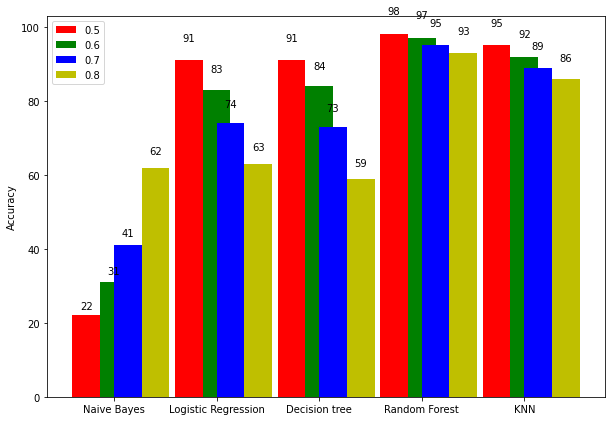

In [ ]:
#this is combined accuracy barplot of all the models
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

avals = [22,91,91,98,95]

rects1 = ax.bar(ind, avals, width, color='r')
yvals = [31, 83, 84,97,92]

rects2 = ax.bar(ind+width, yvals, width, color='g')
zvals = [41,74,73,95,89]

rects3 = ax.bar(ind+width*1.5, zvals, width, color='b')

kvals = [62,63,59,93,86]
rects4 = ax.bar(ind+width*2.5, kvals, width, color='y')
ax.set_ylabel('Accuracy')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Naive Bayes', 'Logistic Regression', 'Decision tree','Random Forest','KNN') )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0]), ('0.5', '0.6', '0.7','0.8') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
plt.rcParams["figure.figsize"] = (10, 7)
plt.show()

In [ ]:
plt.show()